# Interpretable Machine Learning using Eli5

## Dataset - Telecom Customer Churn

### Python Libraries -- XGBOOST, ELI5

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
import eli5
from eli5 import show_prediction

C:\Users\Monica\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Monica\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


## 1. Dataset Reading and Data Pre-processing:

In [5]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn_dataset.csv")

## 2. Plotting Feature Imporatance using xgboost:

### 2.1 Conversion of Categorical Features into Numerical Features:

Conversion of Categorical Features into Numerical Features is required since most of ML and DL Algos are not working properly at categorical data

In [6]:
df = df.apply(LabelEncoder().fit_transform)

In [7]:
########   Conversion into X and y ##################
X = df.iloc[:, :20]
y = df.iloc[:, 20:]

In [8]:
### Dimensions of Matrix X and Vector Y
print(X.shape)
print(y.shape)

(7043, 20)
(7043, 1)


### 2.2 xgboost Model Fit:

In [9]:
# fit model training data
model = XGBClassifier()
model.fit(X, y)

C:\Users\Monica\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### 2.3 Feature Importance with Importance Type = 'Weight':

Importance Type = 'Wieght' is based on the number of times a feature appears in a tree

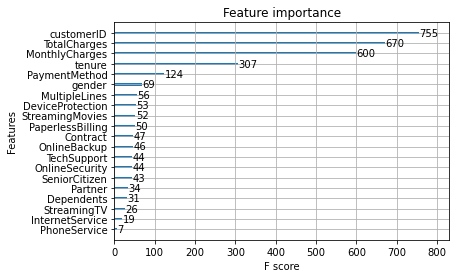

In [10]:
plot_importance(model,importance_type='weight')

::: Monthly Charges, Tenure and Total Charges are top three features obtained from when Importance Type = 'Weight'

### 2.4 Feature Importance with Importance Type = 'Gain':

Importance Type = 'Gain' is based on the average gain of splits which use the feature

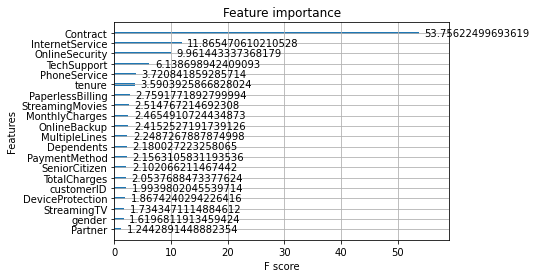

In [11]:
plot_importance(model,importance_type='gain')

::: Contract, Tech Support and Online Security are top three features obtained from when Importance Type = 'Gain'

### 2.5 Feature Importance with Importance Type = 'Cover':

Importance Type = 'Cover' is based on the average coverage -- number of samples affected of splits which use the feature

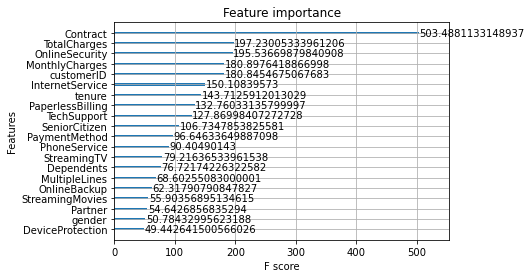

In [12]:
plot_importance(model,importance_type='cover')

::: Tech Support, Contract, and Phone Services are top three features obtained from when Importance Type = 'Cover'

::: Contract, Tech Support and Online Security are top three features repectively using ELI5 tool

## 3. XGBoost Model:

### 3.1 Train and Test Sets (70% and 30%)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### 3.2 Implementation of XGBOOST Model

In [14]:
# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)

In [16]:
print("Accuracy of xgboost: %.2f%%" % (accuracy * 100.0))

Accuracy of xgboost: 78.18%


## 4. Plotting Feature Importance using ELI5:

ELI5 is a Python package which helps to debug machine learning classifiers and explain their predictions.

### 4.1 Feature Importance through ELI5

In [17]:
eli5.show_weights(model.get_booster())

Weight,Feature
0.4379,Contract
0.0752,OnlineSecurity
0.0734,InternetService
0.0535,TechSupport
0.0329,tenure
0.0310,PaperlessBilling
0.0282,MultipleLines
0.0250,StreamingMovies
0.0237,MonthlyCharges
0.0227,Dependents


### 4.2 Reasons for Individual Predictions

In [18]:
print(y_train.iloc[1])
show_prediction(model, X_test.iloc[1], feature_names = X.columns.tolist(), 
                show_feature_values=True)

Churn    0
Name: 1671, dtype: int32


::: Above table explains the features behind individual predictions. 
For a Churned customer -- main features are Contract, Tenure and Online Security.